<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_2_Proposal_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1 — Upload the dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()  # ⬅️ This opens a file picker

# Check uploaded files
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Now, read the file dynamically (no need to type the name manually)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Preview first few rows
df.head()


Saving ifood_df.csv to ifood_df.csv
User uploaded file "ifood_df.csv" with length 219474 bytes


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Cell 2 - inspect columns and dtypes
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes.value_counts())
print("\nMissing values per column (top 20):")
display(df.isnull().sum().sort_values(ascending=False).head(20))


Columns: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Data types:


,count
int64,38
float64,1



Missing values per column (top 20):


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
# Cell 3 - normalize column names and safe cleaning
df.columns = [c.strip().replace(' ', '_').replace('-', '_') for c in df.columns]
# Lowercase optional (uncomment if you prefer)
# df.columns = [c.lower() for c in df.columns]

# Basic duplicate removal
dupes = df.duplicated().sum()
print("Duplicate rows:", dupes)
if dupes:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)

# Convert likely numeric columns to numeric (coerce errors -> NaN)
num_cols_guess = ['Income','income','Recency','recency','MntTotal','mnttotal','MntWines','MntFruits',
                  'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                  'MntRegularProds','Price','quantity','Age']
for col in df.columns:
    if col in num_cols_guess or df[col].dtype == object and df[col].str.replace('.','',1).str.isnumeric().sum() > 0:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with median (safe)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For remaining categorical missing values fill with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    if df[c].isnull().any():
        df[c].fillna(df[c].mode().iloc[0], inplace=True)

print("After cleaning: missing values (top 10):")
display(df.isnull().sum().sort_values(ascending=False).head(10))


Duplicate rows: 184
Dropped duplicates. New shape: (2021, 39)
After cleaning: missing values (top 10):


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
# Cell 4 - create features used for clustering
# Choose meaningful numeric features for marketing segmentation:
features = []

# Typical features from this dataset (adjust if not present)
candidate_features = ['Recency','recency',
                      'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                      'MntSweetProducts','MntGoldProds','MntTotal','MntRegularProds',
                      'Income','income','Kidhome','Teenhome','Age','AcceptedCmpOverall']

# Keep the ones that exist in the dataframe (case-sensitive)
for f in candidate_features:
    if f in df.columns:
        features.append(f)

# Remove duplicates and make final feature list
features = list(dict.fromkeys(features))
print("Using features for clustering:", features)

X = df[features].copy()

# If MntTotal missing but many Mnt* exist, create MntTotal
mnt_cols = [c for c in X.columns if c.lower().startswith('mnt') and 'total' not in c.lower()]
if 'MntTotal' not in X.columns and mnt_cols:
    X['MntTotal'] = X[mnt_cols].sum(axis=1)
    if 'MntTotal' not in features: features.append('MntTotal')

print("Feature matrix shape:", X.shape)
display(X.describe().T)


Using features for clustering: ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds', 'Income', 'Kidhome', 'Teenhome', 'Age', 'AcceptedCmpOverall']
Feature matrix shape: (2021, 14)


,count,mean,std,min,25%,50%,75%,max
Recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0
MntWines,2021.0,306.492331,337.603877,0.0,24.0,178.0,507.0,1493.0
MntFruits,2021.0,26.364671,39.776518,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2021.0,166.059871,219.869126,0.0,16.0,68.0,230.0,1725.0
MntFishProducts,2021.0,37.603662,54.892196,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2021.0,27.268679,41.575454,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2021.0,43.921821,51.678211,0.0,9.0,25.0,56.0,321.0
MntTotal,2021.0,563.789213,576.775749,4.0,55.0,343.0,964.0,2491.0
MntRegularProds,2021.0,519.867392,554.797857,-283.0,42.0,288.0,883.0,2458.0
Income,2021.0,51687.258783,20713.046401,1730.0,35416.0,51412.0,68274.0,113734.0


In [ ]:
# Cell 5 - scaling & PCA for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2D for plot
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio by 2 PCs:", pca.explained_variance_ratio_.round(3))


Explained variance ratio by 2 PCs: [0.46  0.112]


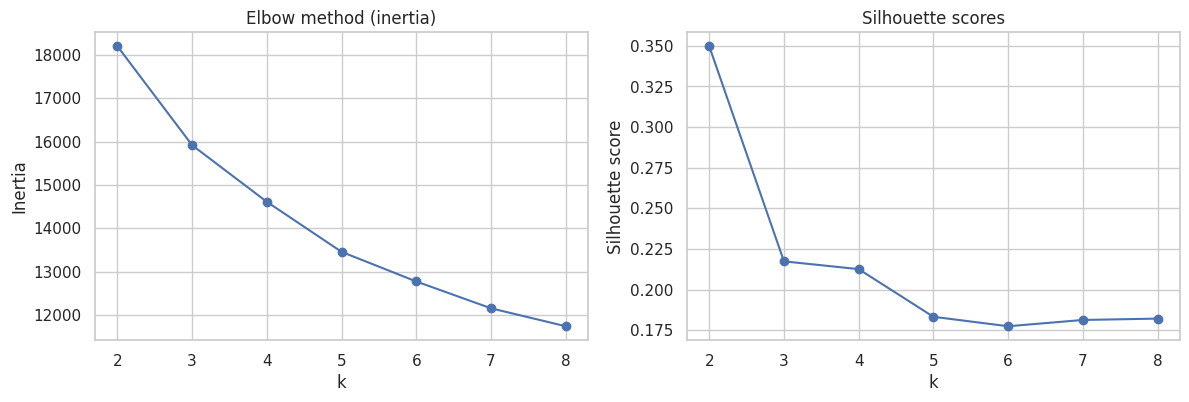

Inertia: {2: 18198.29389383949, 3: 15916.53746279894, 4: 14611.386863665637, 5: 13457.63840310866, 6: 12774.671279394592, 7: 12156.557592848154, 8: 11742.659986040991}
Silhouette scores: {2: np.float64(0.35), 3: np.float64(0.217), 4: np.float64(0.213), 5: np.float64(0.183), 6: np.float64(0.177), 7: np.float64(0.181), 8: np.float64(0.182)}


In [ ]:
# Cell 6 - elbow and silhouette to choose K
inertia = []
sil_scores = []
K_range = range(2,9)  # try k=2..8

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labs = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labs))

# Plot elbow and silhouette
fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].plot(list(K_range), inertia, marker='o')
ax[0].set_title('Elbow method (inertia)')
ax[0].set_xlabel('k'); ax[0].set_ylabel('Inertia')

ax[1].plot(list(K_range), sil_scores, marker='o')
ax[1].set_title('Silhouette scores')
ax[1].set_xlabel('k'); ax[1].set_ylabel('Silhouette score')
plt.show()

print("Inertia:", dict(zip(K_range, inertia)))
print("Silhouette scores:", dict(zip(K_range, [round(s,3) for s in sil_scores])))


In [ ]:
# Cell 7 - final clustering (choose k)
k = 4   # <--- change this after inspecting elbow/silhouette
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=20)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print("Cluster sizes:")
print(df['cluster'].value_counts().sort_index())

# Attach PCA coords for plotting
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]


Cluster sizes:
cluster
0    853
1    184
2    405
3    579
Name: count, dtype: int64


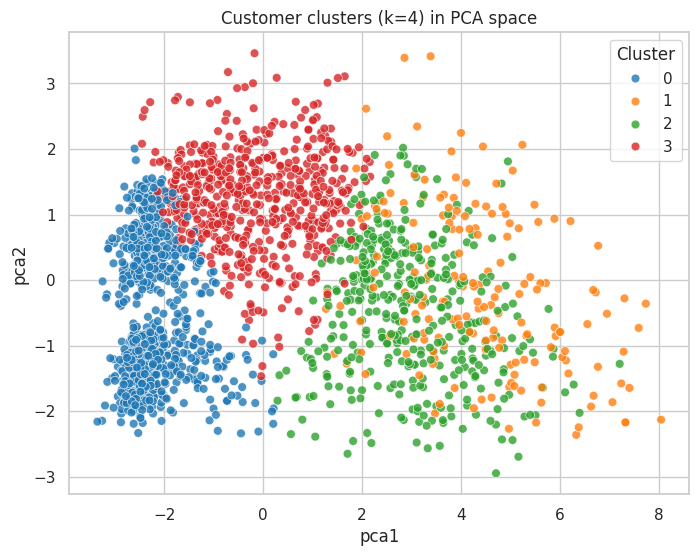

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,Income,Kidhome,Teenhome,Age,AcceptedCmpOverall
cluster,,,,,,,,,,,,,,
0,48.73,44.48,5.71,27.67,7.78,5.63,17.03,91.26,74.23,33323.51,0.91,0.38,46.44,0.09
1,49.38,940.55,52.70,484.11,74.64,60.78,69.76,1612.78,1543.02,80205.68,0.04,0.17,50.77,1.89
2,49.22,495.01,73.54,406.27,106.43,74.67,82.40,1155.93,1073.53,71899.67,0.08,0.30,52.06,0.15
3,48.71,359.14,15.43,100.85,21.62,15.35,48.41,512.39,463.97,55540.21,0.14,0.96,57.46,0.22


In [ ]:
# Cell 8 - scatter plot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=df, s=40, alpha=0.8)
plt.title(f'Customer clusters (k={k}) in PCA space')
plt.legend(title='Cluster')
plt.show()

# Cluster centroids in original feature space (scaled -> unscale for interpretability)
centroids_scaled = kmeans_final.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=X.columns)
centroids_df.index.name = 'cluster'
display(centroids_df.round(2))


In [ ]:
# Cell 9 - profiling clusters
profile = df.groupby('cluster')[features].agg(['count','mean','median']).T
# Show counts and mean for each feature
cluster_summary = df.groupby('cluster')[features].mean().T
display(cluster_summary.round(2))

# An easy, readable summary:
print("\nCluster sizes:")
print(df['cluster'].value_counts().sort_index())

# Example textual profiling
for c in sorted(df['cluster'].unique()):
    sub = df[df['cluster']==c]
    print(f"\nCluster {c} (n={sub.shape[0]}):")
    print(f"  Avg income: {sub['Income'].mean():.0f}" if 'Income' in sub.columns else "")
    if 'MntTotal' in sub.columns:
        print(f"  Avg total spent (MntTotal): {sub['MntTotal'].mean():.1f}")
    if 'Recency' in sub.columns:
        print(f"  Avg recency (days since last purchase): {sub['Recency'].mean():.1f}")


cluster,0,1,2,3
Recency,48.73,49.38,49.22,48.71
MntWines,44.48,940.55,495.01,359.14
MntFruits,5.71,52.70,73.54,15.43
MntMeatProducts,27.67,484.11,406.27,100.85
MntFishProducts,7.78,74.64,106.43,21.62
MntSweetProducts,5.63,60.78,74.67,15.35
MntGoldProds,17.03,69.76,82.40,48.41
MntTotal,91.26,1612.78,1155.93,512.39
MntRegularProds,74.23,1543.02,1073.53,463.97
Income,33323.51,80205.68,71899.67,55540.21



Cluster sizes:
cluster
0    853
1    184
2    405
3    579
Name: count, dtype: int64

Cluster 0 (n=853):
  Avg income: 33324
  Avg total spent (MntTotal): 91.3
  Avg recency (days since last purchase): 48.7

Cluster 1 (n=184):
  Avg income: 80206
  Avg total spent (MntTotal): 1612.8
  Avg recency (days since last purchase): 49.4

Cluster 2 (n=405):
  Avg income: 71900
  Avg total spent (MntTotal): 1155.9
  Avg recency (days since last purchase): 49.2

Cluster 3 (n=579):
  Avg income: 55540
  Avg total spent (MntTotal): 512.4
  Avg recency (days since last purchase): 48.7
